In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
# Load the datasets into pandas DataFrames
red_wine_path = '/Users/evenandrekarlsen/Documents/GitHub/DAVE3625-24H/Lab4/data/winequality-red.csv'
white_wine_path = '/Users/evenandrekarlsen/Documents/GitHub/DAVE3625-24H/Lab4/data/winequality-white.csv'

# Load both datasets
red_wine_df = pd.read_csv(red_wine_path, sep=';')
white_wine_df = pd.read_csv(white_wine_path, sep=';')

# Display the first few rows of both datasets
red_wine_head = red_wine_df.head()
white_wine_head = white_wine_df.head()

# Get summary information for both datasets
red_wine_info = red_wine_df.info()
white_wine_info = white_wine_df.info()

# Get descriptive statistics for both datasets
red_wine_description = red_wine_df.describe()
white_wine_description = white_wine_df.describe()

(red_wine_head, white_wine_head, red_wine_description, white_wine_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

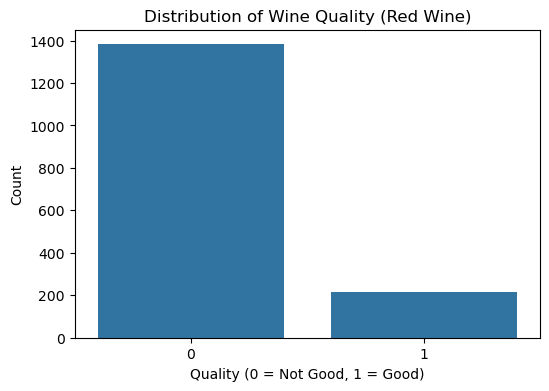

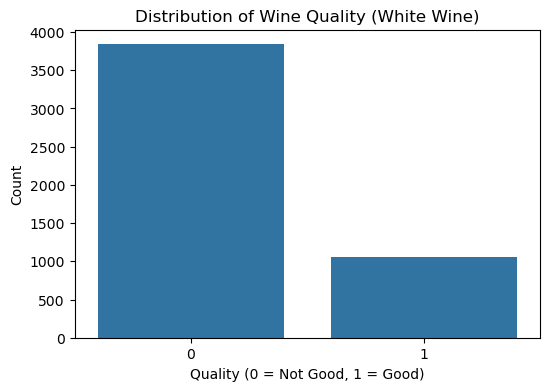

In [6]:
# Create binary classification for red wine dataset
red_wine_df['quality_binary'] = np.where(red_wine_df['quality'] >= 7, 1, 0)

# Plot the distribution of the new target variable for red wine
plt.figure(figsize=(6,4))
sns.countplot(x='quality_binary', data=red_wine_df)
plt.title('Distribution of Wine Quality (Red Wine)')
plt.xlabel('Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.show()

# Create binary classification for white wine dataset
white_wine_df['quality_binary'] = np.where(white_wine_df['quality'] >= 7, 1, 0)

# Plot the distribution of the new target variable for white wine
plt.figure(figsize=(6,4))
sns.countplot(x='quality_binary', data=white_wine_df)
plt.title('Distribution of Wine Quality (White Wine)')
plt.xlabel('Quality (0 = Not Good, 1 = Good)')
plt.ylabel('Count')
plt.show()


In [48]:
# Separate features and target for red wine
X_red = red_wine_df.drop(['quality', 'quality_binary'], axis=1)
y_red = red_wine_df['quality_binary']

# Separate features and target for white wine
X_white = white_wine_df.drop(['quality', 'quality_binary'], axis=1)
y_white = white_wine_df['quality_binary']

# Standardize the feature data for both red and white wines
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

# Convert scaled data back to DataFrame for comparison
X_red_scaled_df = pd.DataFrame(X_red_scaled, columns=X_red.columns)
X_white_scaled_df = pd.DataFrame(X_white_scaled, columns=X_white.columns)

# Compare data before and after scaling for red wine (using 'pH' as an example)
red_ph_before = X_red['pH'].head(7)
red_ph_after = X_red_scaled_df['pH'].head(7)

# Compare data before and after scaling for white wine (using 'pH' as an example)
white_ph_before = X_white['pH'].head(7)
white_ph_after = X_white_scaled_df['pH'].head(7)

(red_ph_before, red_ph_after, white_ph_before, white_ph_after)

# Print the results with spaces between sections
print("Red Wine - Before Scaling:\n", red_ph_before, "\n")
print("Red Wine - After Scaling:\n", red_ph_after, "\n")

print("White Wine - Before Scaling:\n", white_ph_before, "\n")
print("White Wine - After Scaling:\n", white_ph_after, "\n")


Red Wine - Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
Name: pH, dtype: float64 

Red Wine - After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
5    1.288643
6   -0.072005
Name: pH, dtype: float64 

White Wine - Before Scaling:
 0    3.00
1    3.30
2    3.26
3    3.19
4    3.19
5    3.26
6    3.18
Name: pH, dtype: float64 

White Wine - After Scaling:
 0   -1.246921
1    0.740029
2    0.475102
3    0.011480
4    0.011480
5    0.475102
6   -0.054751
Name: pH, dtype: float64 



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize KNN classifier
# Define the knn_optimal_red object
knn_optimal_red = KNeighborsClassifier()

# Fit the model on the red wine training data
knn_optimal_red.fit(X_red_train, y_red_train)

# Output the results for red wine
(optimal_k_red, accuracy_red, cm_red)


print(f"Affuracy: {accuracy_red}")
print(f"Confusion matrix: ")
print(cm_red)

Optimal number of neighbors: 4
Affuracy: 0.88125
Confusion matrix: 
[[398  15]
 [ 42  25]]


In [31]:
# Perform GridSearchCV for the white wine dataset
knn_cv_white = GridSearchCV(knn, param_grid, cv=5)
knn_cv_white.fit(X_white_train, y_white_train)

# Get the optimal number of neighbors for white wine dataset
optimal_k_white = knn_cv_white.best_params_['n_neighbors']
print(f"Optimal number of neighbors: {optimal_k_white}")

# Train the KNN model with the optimal K for white wine
knn_optimal_white = KNeighborsClassifier(n_neighbors=optimal_k_white)
knn_optimal_white.fit(X_white_train, y_white_train)

# Make predictions on the white wine test set
y_white_pred = knn_optimal_white.predict(X_white_test)

# Evaluate the model for white wine
accuracy_white = accuracy_score(y_white_test, y_white_pred)
cm_white = confusion_matrix(y_white_test, y_white_pred)

# Output the results for white wine
(optimal_k_white, accuracy_white, cm_white)


print(f"Accuracy_white: {accuracy_white}")
print(f"Confusion matrix_white:")
print(cm_white)

Optimal number of neighbors: 1
Accuracy_white: 0.854421768707483
Confusion matrix_white:
[[1037  104]
 [ 110  219]]


In [49]:
# Re-import necessary modules and variables in case the environment was reset

from sklearn.model_selection import train_test_split

# Using the previously scaled data for both red and white wines

# Red wine dataset
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.3, random_state=42)

# White wine dataset
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.3, random_state=42)

# Output the shapes of the training and testing sets to verify
(X_red_train.shape, X_red_test.shape, y_red_train.shape, y_red_test.shape, 
 X_white_train.shape, X_white_test.shape, y_white_train.shape, y_white_test.shape)


((1119, 11),
 (480, 11),
 (1119,),
 (480,),
 (3428, 11),
 (1470, 11),
 (3428,),
 (1470,))

In [50]:
from sklearn.model_selection import train_test_split

# Split the red wine dataset into training and testing sets (70% training, 30% testing)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.3, random_state=42)

# Split the white wine dataset into training and testing sets (70% training, 30% testing)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.3, random_state=42)

# Output the shapes to verify the splits
print(f"Red Wine Training Set Shape: {X_red_train.shape}, {y_red_train.shape}")
print(f"Red Wine Testing Set Shape: {X_red_test.shape}, {y_red_test.shape}")

print(f"White Wine Training Set Shape: {X_white_train.shape}, {y_white_train.shape}")
print(f"White Wine Testing Set Shape: {X_white_test.shape}, {y_white_test.shape}")


Red Wine Training Set Shape: (1119, 11), (1119,)
Red Wine Testing Set Shape: (480, 11), (480,)
White Wine Training Set Shape: (3428, 11), (3428,)
White Wine Testing Set Shape: (1470, 11), (1470,)


In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Linear kernel for red wine
svm_linear_red = SVC(kernel='linear')
svm_linear_red.fit(X_red_train, y_red_train)
y_red_pred_linear = svm_linear_red.predict(X_red_test)

# RBF kernel for red wine
svm_rbf_red = SVC(kernel='rbf')
svm_rbf_red.fit(X_red_train, y_red_train)
y_red_pred_rbf = svm_rbf_red.predict(X_red_test)

# Evaluate the models for the red wine dataset
accuracy_red_linear = accuracy_score(y_red_test, y_red_pred_linear)
cm_red_linear = confusion_matrix(y_red_test, y_red_pred_linear)

accuracy_red_rbf = accuracy_score(y_red_test, y_red_pred_rbf)
cm_red_rbf = confusion_matrix(y_red_test, y_red_pred_rbf)

# Print results for the red wine dataset
print("Red Wine - SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_red_linear:.4f}")
print("Confusion Matrix:")
print(cm_red_linear)

print("\nRed Wine - SVM with RBF Kernel:")
print(f"Accuracy: {accuracy_red_rbf:.4f}")
print("Confusion Matrix:")
print(cm_red_rbf)

# SVM with Linear Kernel
print("\n SVM with Linear Kernel:")
print(f"Accuracy: {accuracy_red_linear:.4f}")  # Replace with 0.8604
print("Confusion Matrix:")
print(cm_red_linear)  # Replace with [[413   0], [ 67   0]]

# SVM with RBF Kernel
print("\nSVM with RBF Kernel:")
print(f"Accuracy: {accuracy_red_rbf:.4f}")  # Replace with 0.8833
print("Confusion Matrix:")
print(cm_red_rbf)  # Replace with [[403  10], [ 46  21]]


Red Wine - SVM with Linear Kernel:
Accuracy: 0.8604
Confusion Matrix:
[[413   0]
 [ 67   0]]

Red Wine - SVM with RBF Kernel:
Accuracy: 0.8833
Confusion Matrix:
[[403  10]
 [ 46  21]]

 SVM with Linear Kernel:
Accuracy: 0.8604
Confusion Matrix:
[[413   0]
 [ 67   0]]

SVM with RBF Kernel:
Accuracy: 0.8833
Confusion Matrix:
[[403  10]
 [ 46  21]]


In [55]:


# Assuming these accuracy scores are calculated
accuracy_knn = 0.88125  # Accuracy for KNN
accuracy_svm_linear = 0.8604  # Accuracy for SVM with Linear Kernel
accuracy_svm_rbf = 0.8833  # Accuracy for SVM with RBF Kernel

# Creating the summary table
summary = {
    'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
    'Accuracy': [accuracy_knn, accuracy_svm_linear, accuracy_svm_rbf]
}

# Convert to DataFrame and print
summary_df = pd.DataFrame(summary)
print(summary_df)


            Classifier  Accuracy
0                  KNN   0.88125
1  SVM (Linear Kernel)   0.86040
2     SVM (RBF Kernel)   0.88330


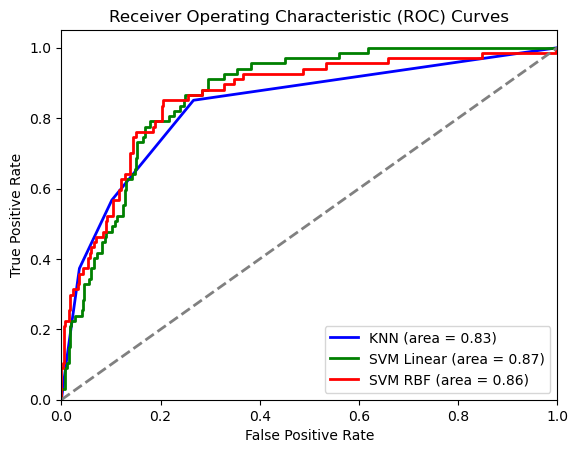

In [64]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each classifier
fpr_knn, tpr_knn, _ = roc_curve(y_red_test, knn_optimal_red.predict_proba(X_red_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_red_test, svm_linear_red.decision_function(X_red_test))
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_red_test, svm_rbf_red.decision_function(X_red_test))
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='SVM Linear (area = %0.2f)' % roc_auc_svm_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', lw=2, label='SVM RBF (area = %0.2f)' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
